# K-Means Clustering Tutorial
## Introduction
K-means clustering is a basic machine learning algorithm for clustering data into groups based on some similarity measure such as distance. The k in k-means is the number of groups or clusters to be generated. So, k=2 means that we would be grouping the data into two clusters. The algorithm starts off with k points or vectors (often chosen at random) and each data point is then compared to each of these k points and grouped into a cluster based on which point it is closest or most similar to. Once these initial clusters are formed, the *mean* of each of the k clusters is then calculated. Then the process is repeated and each data point is once again grouped whatever mean from the k means that it is closest to. This process is repeated until the means no longer change between iterations.

K-means clustering is pretty simple, yet is a very powerful tool for data science/analysis and machine learning. It is often used as a component of more complicated algorithms, such as [spectral clustering](http://www.informatik.uni-hamburg.de/ML/contents/people/luxburg/publications/Luxburg07_tutorial.pdf).

## Example with k=2
Let's use the simplest example of k=2. Below I have chosen some input points that can be easily grouped into two groups.

Populating the interactive namespace from numpy and matplotlib


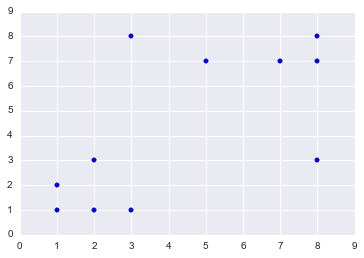

In [1]:
import numpy as np
import seaborn as sns
%pylab inline
import matplotlib.pyplot as plt

# Data to be clustered
data = np.array([
        [1,2],
        [1,1],
        [5,7],
        [8,8],
        [8,3],
        [3,8],
        [3,1],
        [2,1],
        [2,3],
        [7,7],
        [8,7]
    ])

plt.scatter(data[:,0], data[:,1])
plt.show()

Now, obviously it would be easy to group these points by hand, but this is a basic example. With a large dataset, it would be tedious and difficult to group all of the data by hand.

So, let's get into the algorithm.

### 1. Choose 2 random (ish) points to compare the data to

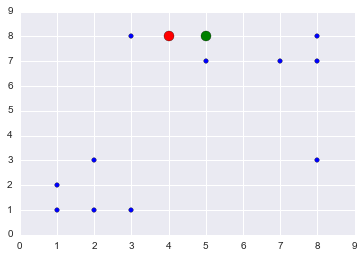

In [2]:
c1 = np.array([4,8]) # Big red dot in the plot
c2 = np.array([5,8]) # Big green dot in the plot

plt.scatter(data[:,0], data[:,1])
plt.scatter(c1[0], c1[1], s=100, c='r')
plt.scatter(c2[0], c2[1], s=100, c='g')

### 2. For each data point, find the distance to c1 and c2 and group according to which one it is closest to

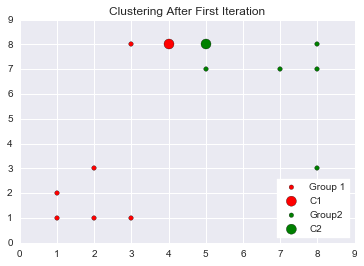

In [3]:
group1 = []
group2 = []

for point in data:
    # Use the Euclidian distance between points to see which cluster center to choose
    if np.linalg.norm(point - c1) < np.linalg.norm(point - c2):
        group1.append(point)
    else:
        group2.append(point)

group1 = np.array(group1)
group2 = np.array(group2)

g1 = plt.scatter(group1[:,0], group1[:,1], c='r')
g2 = plt.scatter(group2[:,0], group2[:,1], c='g')
gc1 = plt.scatter(c1[0], c1[1], s=100, c='r')
gc2 = plt.scatter(c2[0], c2[1], s=100, c='g')

legend = plt.legend((g1, gc1, g2, gc2),
                    ('Group 1', 'C1', 'Group2', 'C2'),
                    scatterpoints=1,
                    loc='lower right',
                    frameon=True)

frame = legend.get_frame()
frame.set_facecolor('white')

plt.title('Clustering After First Iteration')

### 3. Recalculate the cluster centers by taking the mean of each cluster

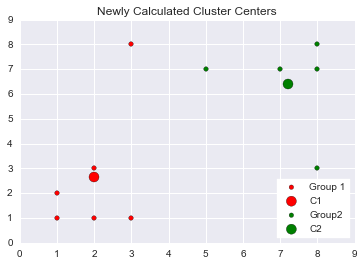

In [4]:
c1 = group1.mean(axis=0)
c2 = group2.mean(axis=0)

g1 = plt.scatter(group1[:,0], group1[:,1], c='r')
g2 = plt.scatter(group2[:,0], group2[:,1], c='g')
gc1 = plt.scatter(c1[0], c1[1], s=100, c='r')
gc2 = plt.scatter(c2[0], c2[1], s=100, c='g')

legend = plt.legend((g1, gc1, g2, gc2),
                    ('Group 1', 'C1', 'Group2', 'C2'),
                    scatterpoints=1,
                    loc='lower right',
                    frameon=True)

frame = legend.get_frame()
frame.set_facecolor('white')

plt.title('Newly Calculated Cluster Centers')

### 4. Recluster the data using the new cluster centers

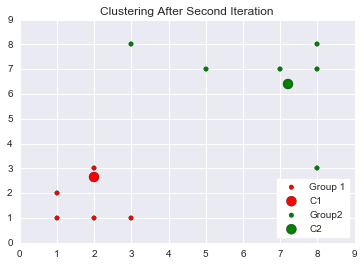

In [5]:
group1 = []
group2 = []

for point in data:
    # Use the Euclidian distance between points to see which cluster center to choose
    if np.linalg.norm(point - c1) < np.linalg.norm(point - c2):
        group1.append(point)
    else:
        group2.append(point)

group1 = np.array(group1)
group2 = np.array(group2)

g1 = plt.scatter(group1[:,0], group1[:,1], c='r')
g2 = plt.scatter(group2[:,0], group2[:,1], c='g')
gc1 = plt.scatter(c1[0], c1[1], s=100, c='r')
gc2 = plt.scatter(c2[0], c2[1], s=100, c='g')

legend = plt.legend((g1, gc1, g2, gc2),
                    ('Group 1', 'C1', 'Group2', 'C2'),
                    scatterpoints=1,
                    loc='lower right',
                    frameon=True)

frame = legend.get_frame()
frame.set_facecolor('white')

plt.title('Clustering After Second Iteration')

Although we have technically arrived at the final clusters with this iteration, we continue to repeat the process until the cluster centers no longer change.
### 5. Repeat until cluster centers no longer change between iterations

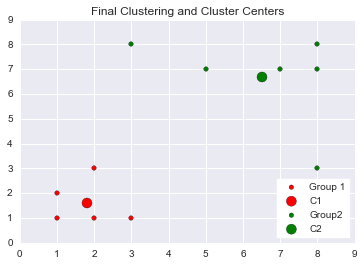

In [6]:
c1_old = c1
c2_old = c2
c1 = group1.mean(axis=0)
c2 = group2.mean(axis=0)

while not ((c1 == c1_old).all() and (c2 == c2_old).all()):
    group1 = []
    group2 = []

    for point in data:
        # Use the Euclidian distance between points to see which cluster center to choose
        if np.linalg.norm(point - c1) < np.linalg.norm(point - c2):
            group1.append(point)
        else:
            group2.append(point)

    group1 = np.array(group1)
    group2 = np.array(group2)
    
    c1_old = c1
    c2_old = c2
    c1 = group1.mean(axis=0)
    c2 = group2.mean(axis=0)

g1 = plt.scatter(group1[:,0], group1[:,1], c='r')
g2 = plt.scatter(group2[:,0], group2[:,1], c='g')
gc1 = plt.scatter(c1[0], c1[1], s=100, c='r')
gc2 = plt.scatter(c2[0], c2[1], s=100, c='g')

legend = plt.legend((g1, gc1, g2, gc2),
                    ('Group 1', 'C1', 'Group2', 'C2'),
                    scatterpoints=1,
                    loc='lower right',
                    frameon=True)

frame = legend.get_frame()
frame.set_facecolor('white')

plt.title('Final Clustering and Cluster Centers')

That's it! That's all there is to it!
## The Easy Way
Now that we know how the algorithm works, it's nice to know that SciPy already has [functions](http://docs.scipy.org/doc/scipy/reference/cluster.vq.html) to perform k-means clustering.

Here's how it works with the [kmeans2](http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans2.html#scipy.cluster.vq.kmeans2) function using our same data from above:

In [7]:
from scipy.cluster.vq import kmeans2

centers, labels = kmeans2(data.astype('float'), k=2)

The kmeans2 function returns two things: centers which correspond to the final means of the groups and labels which map each input point to a group.

Here are the centers that were returned:

In [8]:
print centers

[[ 6.5         6.66666667]
 [ 1.8         1.6       ]]


Note that this is the same result that we got above.

In [9]:
print c1
print c2

[ 1.8  1.6]
[ 6.5         6.66666667]


And here are the labels that were returned along with their corresponding input points:

In [10]:
for label, point in zip(labels, data):
    print 'Point: ' + str(point) + ', Label (Group Number): ' + str(label)

Point: [1 2], Label (Group Number): 1
Point: [1 1], Label (Group Number): 1
Point: [5 7], Label (Group Number): 0
Point: [8 8], Label (Group Number): 0
Point: [8 3], Label (Group Number): 0
Point: [3 8], Label (Group Number): 0
Point: [3 1], Label (Group Number): 1
Point: [2 1], Label (Group Number): 1
Point: [2 3], Label (Group Number): 1
Point: [7 7], Label (Group Number): 0
Point: [8 7], Label (Group Number): 0


And just to double check that we got the same groups, here are the groups from above:

In [11]:
print 'Group 1:'
print group1
print '\nGroup2:'
print group2

Group 1:
[[1 2]
 [1 1]
 [3 1]
 [2 1]
 [2 3]]

Group2:
[[5 7]
 [8 8]
 [8 3]
 [3 8]
 [7 7]
 [8 7]]


That's it!

## Limitations of K-Means Clustering
It should be noted that despite the relatively easy grouping shown in this example, if the data is more nebulous, k-means clustering can produce different results for the same data set depending on what initial cluster centers you start with. This problem can be mitigated somewhat by running k-means multiple times with different starting clusters and then going with the average of the cluster groupings.

Furthermore, k-means is useful if you know how many clusters your data should be grouped into, but if you are unsure, you might not get optimal results. For example, if you set k=2, but the data should ideally be clustered into 5 groups, you will still only get two groups.

## Conclusion
K-means clustering is a [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) algorithm that can be very useful in grouping data for analysis. It does have its limitations, however, so some understanding of whether or not it is appropriate for your data is necessary.

If you have any questions or want to point out something that I should have included but didn't, let me know via GitHub:
[https://github.com/enyeartj](https://github.com/enyeartj)

## Bibliography
- Matteo Matteucci: "A Tutorial on Clustering Algorithms"
[http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/index.html](http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/index.html)
- Wikipedia: [https://en.wikipedia.org/wiki/K-means_clustering](https://en.wikipedia.org/wiki/K-means_clustering)